# Chapter 3 - Modeling and prediction

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The Titanic dataset

We use the Pandas library to import the Titanic survival dataset.

In [20]:
import pandas
data = pandas.read_csv("data/titanic.csv")
data.iloc[:, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
# We make a 80/20% train/test split of the data
data_train = data[:int(0.8*len(data))] # prendo il primo 80% dei dati
data_test = data[int(0.8*len(data)):] # ultimo 20% di dati per il test

In [22]:
unique(data['Embarked'].fillna(""))

array(['', 'C', 'Q', 'S'], dtype=object)

### Preparing the data

In [23]:
# The categorical-to-numerical function from chapter 2
# Changed to automatically add column names
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [37]:
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked'].fillna("")) )
    
    return features

### Building a logistic regression classifier with Scikit-Learn

In [38]:
#cat_to_num(data['Sex'])
features = prepare_data(data_train)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=,Embarked=C,Embarked=Q,Embarked=S
0,3,22.0,1,0,2.692582,0,1,0,0,0,1
1,1,38.0,1,0,8.442944,1,0,0,1,0,0
2,3,26.0,0,0,2.815138,1,0,0,0,0,1
3,1,35.0,1,0,7.286975,1,0,0,0,0,1
4,3,35.0,0,0,2.837252,0,1,0,0,0,1


In [26]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='sag', max_iter=1000)
model2.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [49]:
model2.coef_
prepare_data(data_test)[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=,Embarked=C,Embarked=Q,Embarked=S
712,1,48.0,1,0,7.211103,0,1,0,0,0,1
713,3,29.0,0,0,3.079497,0,1,0,0,0,1
714,2,52.0,0,0,3.605551,0,1,0,0,0,1
715,3,19.0,0,0,2.765863,0,1,0,0,0,1
716,1,38.0,0,0,15.083932,1,0,0,1,0,0


In [50]:
# Make predictions
model2.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [51]:
data_test["Survived"]

712    1
713    0
714    0
715    0
716    1
717    1
718    0
719    0
720    1
721    0
722    0
723    0
724    1
725    0
726    1
727    1
728    0
729    0
730    1
731    0
732    0
733    0
734    0
735    0
736    0
737    1
738    0
739    0
740    1
741    0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 179, dtype: int64

In [52]:
# The accuracy of the model on the test data
# (this will be introduced in more details in chapter 4)
print(model2.score(prepare_data(data_test), data_test["Survived"]))
print(model2.score(prepare_data(data_train), data_train["Survived"]))


0.8268156424581006
0.7879213483146067


In [53]:
model2.predict_proba(prepare_data(data_test))

array([[0.68237361, 0.31762639],
       [0.89420279, 0.10579721],
       [0.83178238, 0.16821762],
       [0.88563527, 0.11436473],
       [0.04211669, 0.95788331],
       [0.21700789, 0.78299211],
       [0.83171422, 0.16828578],
       [0.9004824 , 0.0995176 ],
       [0.17296908, 0.82703092],
       [0.9076025 , 0.0923975 ],
       [0.80152331, 0.19847669],
       [0.8286111 , 0.1713889 ],
       [0.62771857, 0.37228143],
       [0.88534312, 0.11465688],
       [0.35393864, 0.64606136],
       [0.28099874, 0.71900126],
       [0.80645805, 0.19354195],
       [0.43355173, 0.56644827],
       [0.05148364, 0.94851636],
       [0.82687098, 0.17312902],
       [0.7840469 , 0.2159531 ],
       [0.78110386, 0.21889614],
       [0.78110386, 0.21889614],
       [0.88639677, 0.11360323],
       [0.55257146, 0.44742854],
       [0.24412164, 0.75587836],
       [0.86037808, 0.13962192],
       [0.86037808, 0.13962192],
       [0.52501329, 0.47498671],
       [0.62170211, 0.37829789],
       [0.

In [54]:
model2.coef_

array([[-0.75289653, -0.01124833, -0.25153579, -0.15418528,  0.07967069,
         1.69680794, -0.93257924,  0.03863301,  0.3771559 ,  0.23962741,
         0.10881239]])

In [55]:
len(model2.coef_[0])

11

In [56]:
model2.intercept_

array([1.02890397])

### Non-linear model with Support Vector Machines

In [75]:
from sklearn.svm import SVC
#model = SVC(gamma=0.05)
#model = SVC(gamma=10.0)
#model = SVC(gamma=100.0)
model = SVC(gamma=0.1, C=1, probability=True)
model.fit(features, data_train["Survived"])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
print(model.score(prepare_data(data_train), data_train["Survived"]))
model.score(prepare_data(data_test), data_test["Survived"])

0.8623595505617978


0.8603351955307262

In [77]:
model.predict_proba(prepare_data(data_test))

array([[0.6027873 , 0.3972127 ],
       [0.84406431, 0.15593569],
       [0.83485793, 0.16514207],
       [0.84163721, 0.15836279],
       [0.39485167, 0.60514833],
       [0.21399399, 0.78600601],
       [0.83270413, 0.16729587],
       [0.82767345, 0.17232655],
       [0.09761612, 0.90238388],
       [0.86920153, 0.13079847],
       [0.6907598 , 0.3092402 ],
       [0.76117231, 0.23882769],
       [0.44768467, 0.55231533],
       [0.83498546, 0.16501454],
       [0.42244875, 0.57755125],
       [0.17013001, 0.82986999],
       [0.73570765, 0.26429235],
       [0.33749529, 0.66250471],
       [0.48665071, 0.51334929],
       [0.14442192, 0.85557808],
       [0.83348848, 0.16651152],
       [0.83349541, 0.16650459],
       [0.83349541, 0.16650459],
       [0.84823001, 0.15176999],
       [0.56475603, 0.43524397],
       [0.17446503, 0.82553497],
       [0.84491219, 0.15508781],
       [0.84491219, 0.15508781],
       [0.8199703 , 0.1800297 ],
       [0.22216207, 0.77783793],
       [0.

### Classification with multiple classes: hand-written digits

We use the popular non-linear multi-class K-nearest neighbor algorithm to predict hand-written digits from the MNIST dataset.


In [78]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [79]:
mnist_test.head()
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 800 to 999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 1.2 MB


In [80]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [91]:
preds = knn.predict_proba(mnist_test.drop("label", axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Digit 2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Digit 3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Digit 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Digit 5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [92]:
knn.score(mnist_test.drop("label", axis=1), mnist_test['label'])

0.87

In [89]:
mnist_test['label']

800    5
801    3
802    6
803    7
804    4
805    3
806    9
807    7
808    2
809    0
810    4
811    7
812    2
813    2
814    8
815    2
816    7
817    0
818    4
819    0
820    5
821    2
822    8
823    7
824    7
825    9
826    1
827    4
828    0
829    1
      ..
970    7
971    3
972    7
973    8
974    0
975    1
976    0
977    2
978    9
979    7
980    6
981    2
982    2
983    6
984    9
985    0
986    6
987    8
988    8
989    9
990    6
991    3
992    5
993    0
994    2
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 200, dtype: int64

### Predicting numerical values with a regression model

We use the the Linear Regression algorithm to predict miles-per-gallon of various automobiles.

In [93]:
auto = pandas.read_csv("data/auto-mpg.csv")

# Convert origin to categorical variable
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

# Split in train/test set
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#reg = LinearRegression()
reg = GradientBoostingRegressor()
reg.fit(auto_train.drop('mpg', axis=1), auto_train["mpg"])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
pred_mpg = reg.predict(auto_test.drop('mpg',axis=1))

In [99]:
pred_mpg

array([24.79893643, 22.46891925, 35.83912209, 29.89817355, 30.35084149,
       31.45854356, 33.29857625, 34.82447233, 25.98424884, 33.19477107,
       43.36956469, 35.03734745, 25.509661  , 24.32212379, 39.52556275,
       35.34426878, 36.15269391, 23.75289289, 28.10247049, 30.70298629,
       32.72619396, 28.83127081, 28.47060146, 30.52123198, 26.7696473 ,
       31.43659341, 36.8398726 , 34.43922878, 36.45329242, 36.37193649,
       36.04628177, 35.98933483, 35.84336063, 34.169941  , 33.79159204,
       28.67478851, 39.12213804, 38.88047456, 30.53763206, 29.13971991,
       29.12789687, 25.78018383, 23.20454986, 25.81510564, 24.68896742,
       21.09673861, 20.93143095, 23.04074755, 22.44612274, 28.8573548 ,
       29.29672858, 29.58202476, 29.80527843, 28.83127081, 28.43104372,
       25.63181336, 35.95905036, 36.45931165, 37.03331789, 36.30836371,
       33.51830133, 37.77876078, 38.88047456, 32.79481594, 37.5142825 ,
       35.60733972, 35.92304908, 21.95977907, 22.29689839, 30.69

# Plotting the Regression

In [100]:
# The coefficients
print('Coefficients: \n', reg.coef_)
coefficients = pandas.concat([pandas.DataFrame(auto_train.drop('mpg',axis=1).columns),pandas.DataFrame(np.transpose(reg.coef_))], axis = 1)
print(coefficients)
print('Intercept: \n', reg.intercept_)

# Plot outputs
plt.scatter(auto_test.weight, auto_test.mpg,  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

# Scoring the Regression

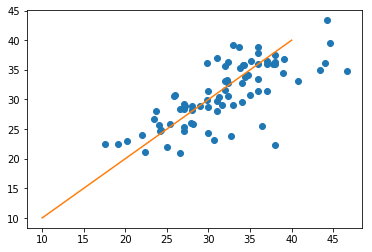

In [101]:
plot(auto_test.mpg, pred_mpg, 'o')
x = linspace(10,40,5)
plot(x, x, '-');

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(auto_test.mpg, pred_mpg))
print(mean_squared_error(auto_test.mpg, pred_mpg))

0.49105088137154174
18.425807632246443


In [103]:
# Using model score
print(reg.score(auto_test.drop('mpg',axis=1), auto_test.mpg))

0.4910508813715417
